# GLS PERIODOGRAM RESULTS - COMPARISON OF RESULTS WITH CARMENES (CARM\_VIS) RV CURVES AND TESS LIGHT CURVES

We review the results of the GLS periodograms applied over the 269 objects for which periodograms were calculated for both CARMENES (CARM\_VIS) RV curves and TESS light curves (ML sample).

We then compare the results obtained with the periodograms of CARMENES (CARM\_VIS) RV curves and TESS light curves.

## Modules and configuration

### Modules

In [1]:
import pandas as pd
import numpy as np

import sys

from scipy.stats import ttest_ind, ttest_rel, pearsonr

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import lines
plt.figure(figsize = (15, 10), dpi = 80)

import seaborn as sns
sns.set_style("white", {'figure.figsize':(15,10)})

<Figure size 1200x800 with 0 Axes>

### Configuration

In [2]:
GTO_FILE = "../data/SELECTION_for_PG_CARM_VIS_objects_with_PG.csv"
IMAGE_FOLDER = "./img/"

INTEREST_STARS_OUT = "../data/Stars_of_interest_PG.csv"
LATEX_INTEREST_STARS_OUT = "../Additional_LaTeX_files/Tables/Stars_of_interest_PG.tex"


### Functions

In [39]:
def compare_dist(d1, d2, d1_label, d2_label, varname, category_name, 
                 title_override=None, xlabel_override=None, ylabel_override=None,
                 fig_filename=None):
    '''Plots and saves overlapped histograms.
    It also shows the result of a t-Student test.'''
    # Plots and saves the figure
    kwargs = dict(hist_kws={'alpha':.4}, kde_kws={'linewidth':2})
    plt.figure(figsize=(10,7))
    sns.distplot(d1, label=d1_label, **kwargs)
    sns.distplot(d2, label=d2_label, **kwargs)
    if title_override is not None:
        plt.title(title_override, fontsize=16)
    else:
        plt.title(varname + " values distributions, per " + category_name, fontsize=16)
    #plt.grid(axis='x', alpha=0.75)
    if xlabel_override is not None:
        plt.xlabel(xlabel_override, fontsize=12)
    else:
        plt.xlabel(varname, fontsize=12)
    if ylabel_override is not None:
        plt.ylabel(ylabel_override, fontsize=12)
    else:
        plt.ylabel('Frequency', fontsize=12)
#    sns.distplot(d1, label=d1_label, **kwargs)
#    sns.distplot(d2, label=d2_label, **kwargs)
    #plt.xlim(0,100)
    plt.legend(loc='upper right');
    # Save the image:
    if fig_filename is not None:
        plt.savefig(fig_filename, format='jpg')
    else:
        pass
    # Perform the t-Student test (as independent samples):
    stat, p = ttest_ind(d1, d2)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably the same distribution')
    else:
        print('***Probably different distributions')

In [4]:
def scatter_graph(data, var_x, var_y, category_name, fig_filename):
    '''Plots a scatter plot of two columns of a dataframe.
    It also calculates and shows Pearson's correlation coefficient.'''
    #rv_x_var = var_x
    #tess_y_var = var_y
    #kwargs = dict(hist_kws={'alpha':.4}, kde_kws={'linewidth':2})
    plt.figure(figsize=(10,7))
    plt.title(var_y + " vs " + var_x, fontsize=16)
    plt.grid(axis='both', alpha=0.75)
    plt.xlabel(var_x, fontsize=12)
    plt.ylabel(var_y, fontsize=12)
    sns.scatterplot(data=data, x=var_x, y=var_y, hue=category_name)
#    plt.xlim(0.0, 1.0)
#    plt.ylim(0.0, 1.0)    
    plt.legend(loc='upper right');
    # Save the image:
    plt.savefig(fig_filename, format='jpg')
    # Calculate the Pearson correlation coefficient between the two results:
    corr, _ = pearsonr(data[var_x], data[var_y])
    print('Pearson\'s correlation value: %.3f' % corr)

In [47]:
def draw_scatter(data, x, y, hue=None, size=None, alpha=None,
                 href_lines=[], href_label="", href_color="darkred", href_style=".",
                 vref_lines=[], vref_label="", vref_color="darkblue", vref_style="--",
                 title_override=None, xlabel_override=None, ylabel_override=None,
                 fig_filename=None):
    '''Draws a scatter plot as per the data passed, setting the title'''
    #sns.set_style("white", {'figure.figsize':(16,9)})
    #sns.set_style("white", {'figure.figsize':(10,10)})
    ax = sns.scatterplot(data=data, x=x, y=y, hue=hue, size=size, alpha=alpha)
    #handles = []
    handles, labels = ax.get_legend_handles_labels()
    for i in range(0, len(href_lines)):
        if i == 0 and href_label is not None:
            handles.append(lines.Line2D([], [], color=href_color, linestyle=href_style, label=href_label))
        else:
            pass
        ax.axhline(y=href_lines[i], color=href_color, linestyle=href_style)
    for i in range(0, len(vref_lines)):
        if i == 0 and vref_label is not None:
            handles.append(lines.Line2D([], [], color=vref_color, linestyle=vref_style, label=vref_label))
        else:
            pass
        ax.axvline(x=vref_lines[i], color=vref_color, linestyle=vref_style)
    if title_override is None:
        title = "Correlation - " + x + " vs. " + y
        if hue is not None:
            title = title + "\nBy " + hue + " (colour)"
        if size is not None:
            title = title + "\nBy " + size + " (size)"
    else:
        title = title_override
    ax.set_title(title, fontsize='x-large')
    if xlabel_override is None:
        ax.set_xlabel(x, fontsize='large')
    else:
        ax.set_xlabel(xlabel_override, fontsize='large')
    if ylabel_override is None:
        ax.set_ylabel(y, fontsize='large')
    else:
        ax.set_ylabel(ylabel_override, fontsize='large')
    ax.figure.set_size_inches(10, 7)
    ax.legend(handles=handles, loc='upper right')
    
    if fig_filename == None:
        pass
    else:
        ax.figure.savefig(fig_filename, format='jpg')
    # Calculate the Pearson correlation coefficient between the two results:
    corr, _ = pearsonr(data[x], data[y])
    print('Pearson\'s correlation value: %.3f' % corr)

## Load CARM\_VIS table with GLS results (only the subset for PG analysis)

In [6]:
gto = pd.read_csv(GTO_FILE, sep=',', decimal='.')
gto.head()

,Karmn,Name,Comp,GJ,RA_J2016_deg,DE_J2016_deg,RA_J2000,DE_J2000,l_J2016_deg,b_J2016_deg,...,WF_offset_PG_TESS,WF_e_offset_PG_TESS,WF_FAP_PG_TESS,WF_valid_PG_TESS,WF_error_PG_TESS,WF_elapsed_time_PG_TESS,WF_plain_file_TESS,WF_fig_file_TESS,PG_file_RV,PG_file_TESS
0,J23548+385,RX J2354.8+3831,-,NaN,358.713658,38.526340,23:54:51.46,+38:31:36.2,110.941908,-23.024449,...,999.999756,2.151008e-06,1.0,1.0,NaN,94.758838,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23548+38...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...,../data/CARM_VIS_RVs_PGs/J23548+385_RV_PG.dat,../data/CARM_VIS_TESS_PGs/J23548+385_RV_PG.dat
1,J23505-095,LP 763-012,-,4367,357.634705,-9.560964,23:50:31.64,-09:33:32.7,80.777067,-67.303426,...,1000.000122,9.022946e-07,1.0,1.0,NaN,132.607176,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23505-09...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...,../data/CARM_VIS_RVs_PGs/J23505-095_RV_PG.dat,../data/CARM_VIS_TESS_PGs/J23505-095_RV_PG.dat
2,J23431+365,GJ 1289,-,1289,355.781509,36.536310,23:43:06.31,+36:32:13.1,107.922839,-24.336479,...,999.999512,4.306074e-06,1.0,1.0,NaN,97.939914,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23431+36...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...,../data/CARM_VIS_RVs_PGs/J23431+365_RV_PG.dat,../data/CARM_VIS_TESS_PGs/J23431+365_RV_PG.dat
3,J23381-162,G 273-093,-,4352,354.532687,-16.236514,23:38:08.16,-16:14:10.2,61.845437,-69.825220,...,1000.000122,9.022946e-07,1.0,1.0,NaN,136.603404,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23381-16...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...,../data/CARM_VIS_RVs_PGs/J23381-162_RV_PG.dat,../data/CARM_VIS_TESS_PGs/J23381-162_RV_PG.dat
4,J23245+578,BD+57 2735,-,895,351.126628,57.853057,23:24:30.51,+57:51:15.5,111.552287,-3.085183,...,999.999512,3.720858e-06,1.0,1.0,NaN,131.327304,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23245+57...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...,../data/CARM_VIS_RVs_PGs/J23245+578_RV_PG.dat,../data/CARM_VIS_TESS_PGs/J23245+578_RV_PG.dat


In [7]:
print(list(gto.columns))

['Karmn', 'Name', 'Comp', 'GJ', 'RA_J2016_deg', 'DE_J2016_deg', 'RA_J2000', 'DE_J2000', 'l_J2016_deg', 'b_J2016_deg', 'Ref01', 'SpT', 'SpTnum', 'Ref02', 'Teff_K', 'eTeff_K', 'logg', 'elogg', '[Fe/H]', 'e[Fe/H]', 'Ref03', 'L_Lsol', 'eL_Lsol', 'Ref04', 'R_Rsol', 'eR_Rsol', 'Ref05', 'M_Msol', 'eM_Msol', 'Ref06', 'muRA_masa-1', 'emuRA_masa-1', 'muDE_masa-1', 'emuDE_masa-1', 'Ref07', 'pi_mas', 'epi_mas', 'Ref08', 'd_pc', 'ed_pc', 'Ref09', 'Vr_kms-1', 'eVr_kms-1', 'Ref10', 'ruwe', 'Ref11', 'U_kms-1', 'eU_kms-1', 'V_kms-1', 'eV_kms-1', 'W_kms-1', 'eW_kms-1', 'Ref12', 'sa_m/s/a', 'esa_m/s/a', 'Ref13', 'SKG', 'Ref14', 'SKG_lit', 'Ref14_lit', 'Pop', 'Ref15', 'vsini_flag', 'vsini_kms-1', 'evsini_kms-1', 'Ref16', 'P_d', 'eP_d', 'Ref17', 'pEWHalpha_A', 'epEWHalpha_A', 'Ref18', 'log(LHalpha/Lbol)', 'elog(LHalpha/Lbol)', 'Ref19', '1RXS', 'CRT_s-1', 'eCRT_s-1', 'HR1', 'eHR1', 'HR2', 'eHR2', 'Flux_X_E-13_ergcm-2s-1', 'eFlux_X_E-13_ergcm-2s-1', 'LX/LJ', 'eLX/LJ', 'Ref20', 'Activity', 'Ref21', 'FUV_mag',

In [8]:
gto.shape

(269, 300)

So, we have 269 objects for which we have both valid TESS and CARMENES results.

## Analysis of results

### Instability band

In [9]:
gto[['InstBand_nominal', 'InstBand_ranged']].describe()

,InstBand_nominal,InstBand_ranged
count,269,269
unique,2,2
top,He3-burning,He3-burning
freq,173,199


In [10]:
gto[gto['InstBand_nominal'] != "none"].shape

(173, 300)

In [11]:
gto[gto['InstBand_ranged'] != "none"].shape

(199, 300)

Hence, we have 173 stars inside the instability band ($\approx64\%$). If we consider the value ranges given by the errors in the variables, the number rises to 199 stars ($\approx74\%$). This last number is important, as it is near the $\approx72\%$ value obtained for the full CARM\_VIS sample of 390 stars, i.e. not significantly changed by selecting this subset of stars.

In all plots, we will differentiate between samples in the ranged instability band and the samples outside of that band.

#### FAP distributions by instability band (CARMENES RV)

C:\Users\ciroe\AppData\Local\Temp\ipykernel_28280\4149133756.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1, label=d1_label, **kwargs)
C:\Users\ciroe\AppData\Local\Temp\ipykernel_28280\4149133756.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d2, label=d2_label, **kwargs)


stat=0.322, p=0.748
Probably the same distribution


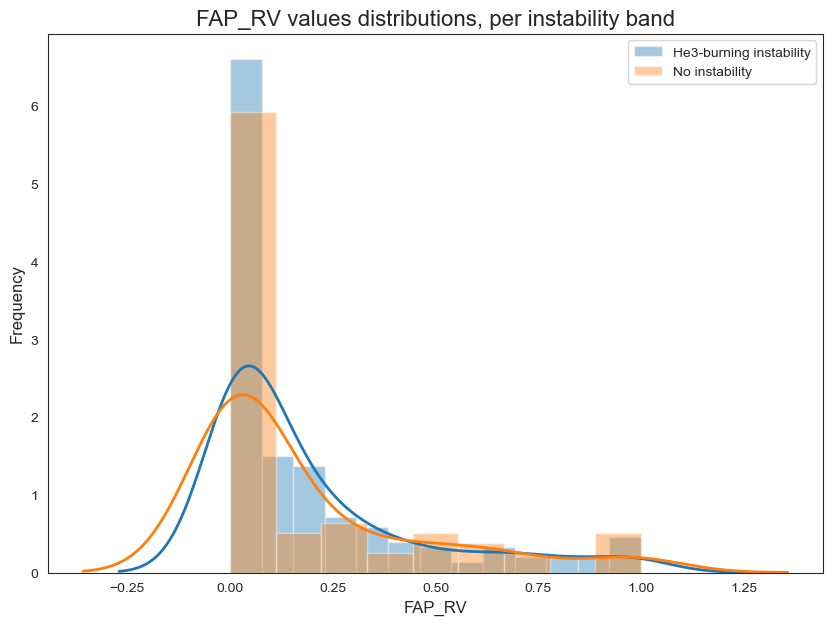

In [12]:
varname = 'FAP_RV'
colname = 'FAP_PG_RV'
img_id = "_01_"
compare_dist(d1=gto.loc[gto['InstBand_ranged'] == "He3-burning", colname],
             d2=gto.loc[gto['InstBand_ranged'] == "none", colname],
             d1_label="He3-burning instability", d2_label="No instability",
             varname=varname, category_name="instability band",
             fig_filename = IMAGE_FOLDER + "Analysis_11" + img_id + varname + "_vs_InstBand.jpg")


**OBSERVATION:** there seems to be no difference between the samples inside the He-3 instability band and the ones outside the instability band for the FAP of CARMENES RGV curves periodograms.

#### FAP distributions by instability band (TESS LC)

C:\Users\ciroe\AppData\Local\Temp\ipykernel_28280\4149133756.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1, label=d1_label, **kwargs)
C:\Users\ciroe\AppData\Local\Temp\ipykernel_28280\4149133756.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d2, label=d2_label, **kwargs)


stat=nan, p=nan
***Probably different distributions


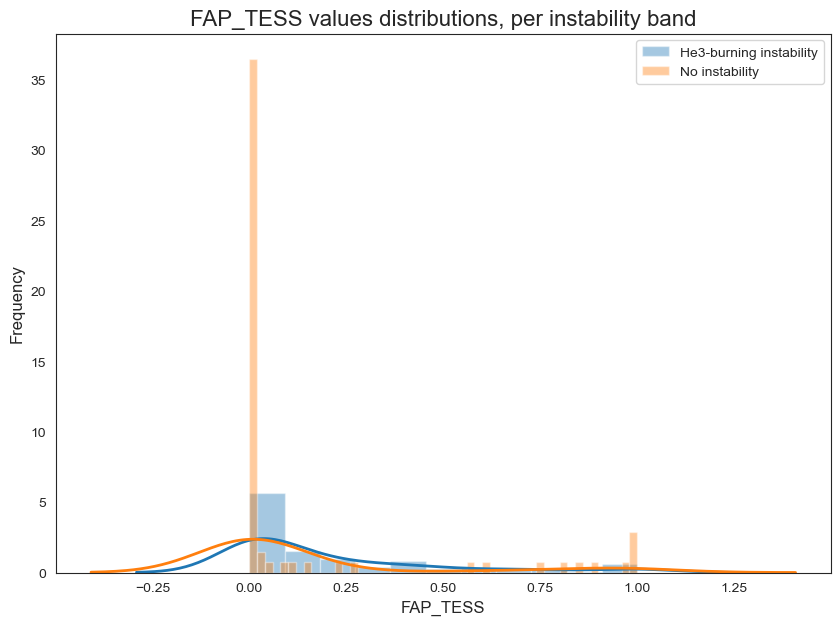

In [13]:
varname = 'FAP_TESS'
colname = 'FAP_PG_TESS'
img_id = "_02_"
compare_dist(d1=gto.loc[gto['InstBand_ranged'] == "He3-burning", colname],
             d2=gto.loc[gto['InstBand_ranged'] == "none", colname],
             d1_label="He3-burning instability", d2_label="No instability",
             varname=varname, category_name="instability band",
             fig_filename = IMAGE_FOLDER + "Analysis_11" + img_id + varname + "_vs_InstBand.jpg")

**OBSERVATION:** there seems to be no difference between the samples inside the He-3 instability band and the ones outside the instability band for the FAP of CARMENES RGV curves periodograms.

#### Detected period distributions by instability band (CARMENES RV)

C:\Users\ciroe\AppData\Local\Temp\ipykernel_28280\4149133756.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1, label=d1_label, **kwargs)
C:\Users\ciroe\AppData\Local\Temp\ipykernel_28280\4149133756.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d2, label=d2_label, **kwargs)


stat=-1.468, p=0.143
Probably the same distribution


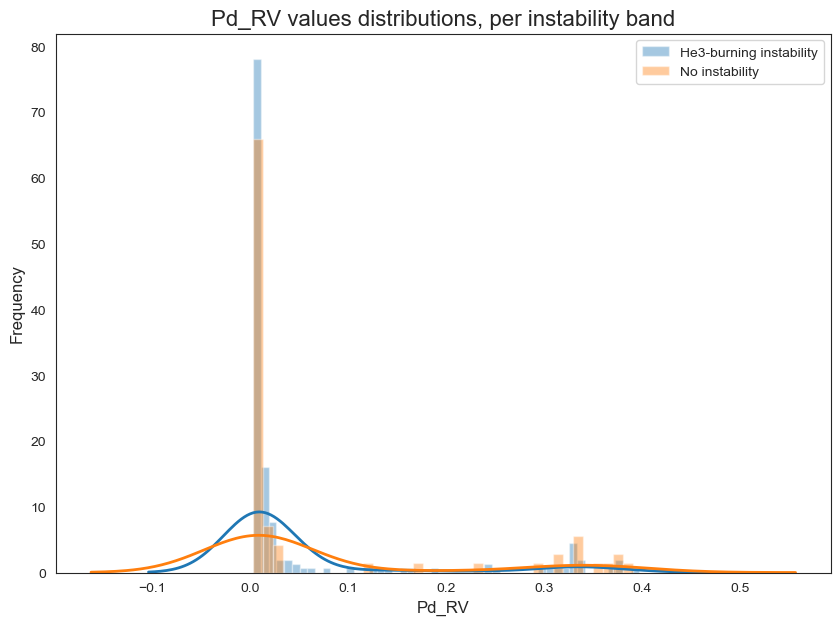

In [14]:
varname = 'Pd_RV'
colname = 'Pd_PG_RV'
img_id = "_03_"
compare_dist(d1=gto.loc[gto['InstBand_ranged'] == "He3-burning", colname],
             d2=gto.loc[gto['InstBand_ranged'] == "none", colname],
             d1_label="He3-burning instability", d2_label="No instability",
             varname=varname, category_name="instability band",
             fig_filename = IMAGE_FOLDER + "Analysis_11" + img_id + varname + "_vs_InstBand.jpg")


#### Detected period distributions by instability band (TESS LC)

C:\Users\ciroe\AppData\Local\Temp\ipykernel_28280\4149133756.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1, label=d1_label, **kwargs)
C:\Users\ciroe\AppData\Local\Temp\ipykernel_28280\4149133756.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d2, label=d2_label, **kwargs)


stat=-1.026, p=0.306
Probably the same distribution


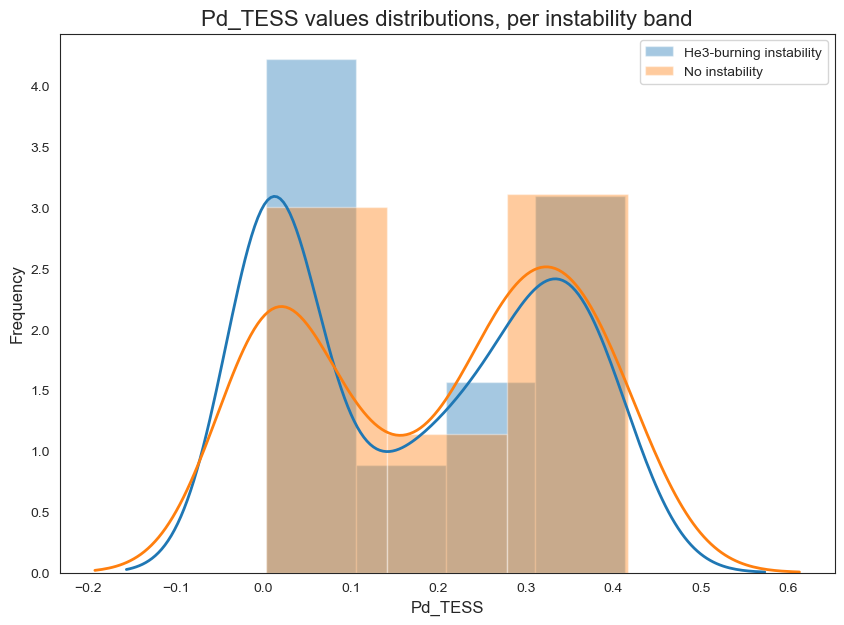

In [15]:
varname = 'Pd_TESS'
colname = 'Pd_PG_TESS'
img_id = "_04_"
compare_dist(d1=gto.loc[gto['InstBand_ranged'] == "He3-burning", colname],
             d2=gto.loc[gto['InstBand_ranged'] == "none", colname],
             d1_label="He3-burning instability", d2_label="No instability",
             varname=varname, category_name="instability band",
             fig_filename = IMAGE_FOLDER + "Analysis_11" + img_id + varname + "_vs_InstBand.jpg")

#### Detected amplitudes distributions by instability band (CARMENES RV)

C:\Users\ciroe\AppData\Local\Temp\ipykernel_28280\4149133756.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1, label=d1_label, **kwargs)
C:\Users\ciroe\AppData\Local\Temp\ipykernel_28280\4149133756.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d2, label=d2_label, **kwargs)


stat=-2.460, p=0.015
***Probably different distributions


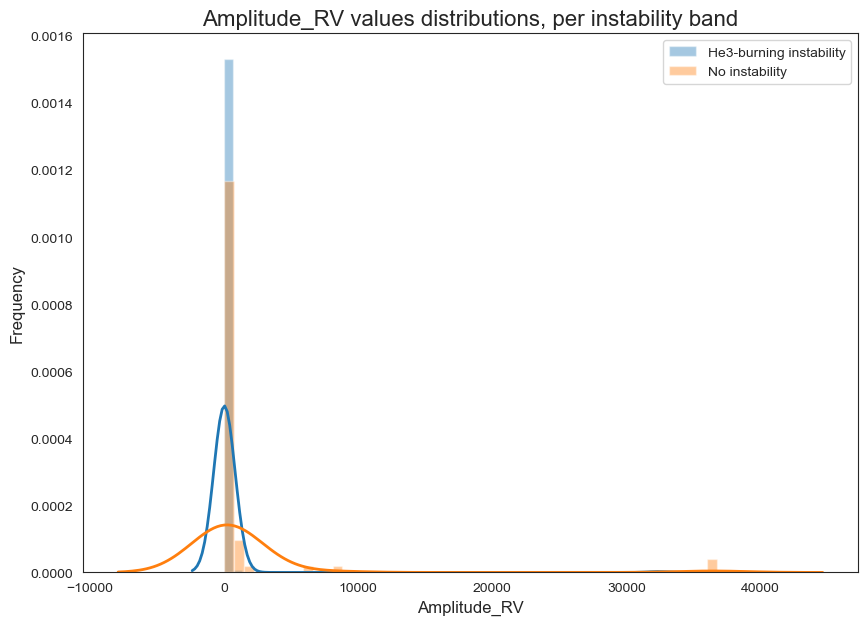

In [16]:
varname = 'Amplitude_RV'
colname = 'A_PG_RV'
img_id = "_05_"
compare_dist(d1=gto.loc[gto['InstBand_ranged'] == "He3-burning", colname],
             d2=gto.loc[gto['InstBand_ranged'] == "none", colname],
             d1_label="He3-burning instability", d2_label="No instability",
             varname=varname, category_name="instability band",
             fig_filename = IMAGE_FOLDER + "Analysis_11" + img_id + varname + "_vs_InstBand.jpg")


#### Detected amplitudes distributions by instability band (TESS LC)

C:\Users\ciroe\AppData\Local\Temp\ipykernel_28280\4149133756.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1, label=d1_label, **kwargs)
C:\Users\ciroe\AppData\Local\Temp\ipykernel_28280\4149133756.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d2, label=d2_label, **kwargs)


stat=0.841, p=0.401
Probably the same distribution


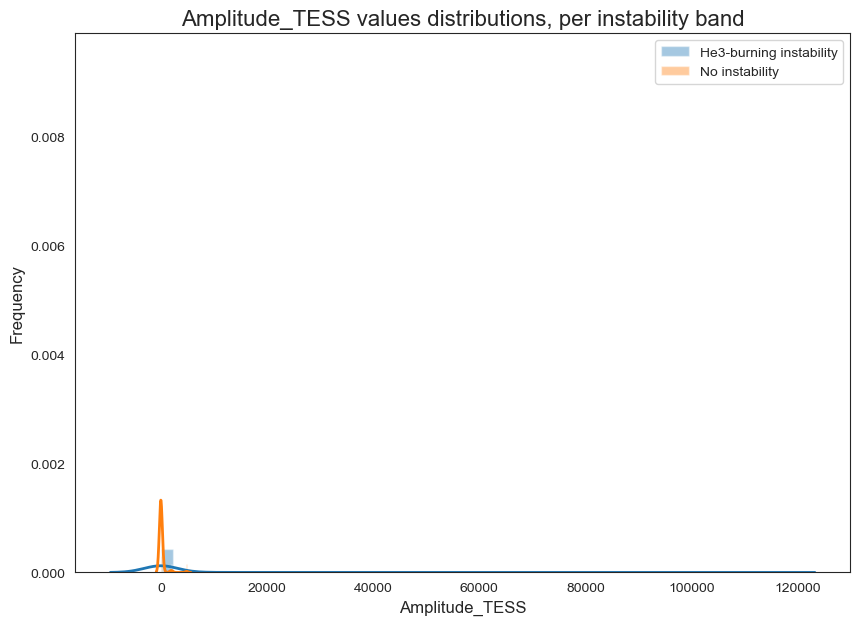

In [17]:
varname = 'Amplitude_TESS'
colname = 'A_PG_TESS'
img_id = "_06_"
compare_dist(d1=gto.loc[gto['InstBand_ranged'] == "He3-burning", colname],
             d2=gto.loc[gto['InstBand_ranged'] == "none", colname],
             d1_label="He3-burning instability", d2_label="No instability",
             varname=varname, category_name="instability band",
             fig_filename = IMAGE_FOLDER + "Analysis_11" + img_id + varname + "_vs_InstBand.jpg")

#### Detected offset distributions by instability band (CARMENES RV)

C:\Users\ciroe\AppData\Local\Temp\ipykernel_28280\4149133756.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1, label=d1_label, **kwargs)
C:\Users\ciroe\AppData\Local\Temp\ipykernel_28280\4149133756.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d2, label=d2_label, **kwargs)


stat=0.662, p=0.508
Probably the same distribution


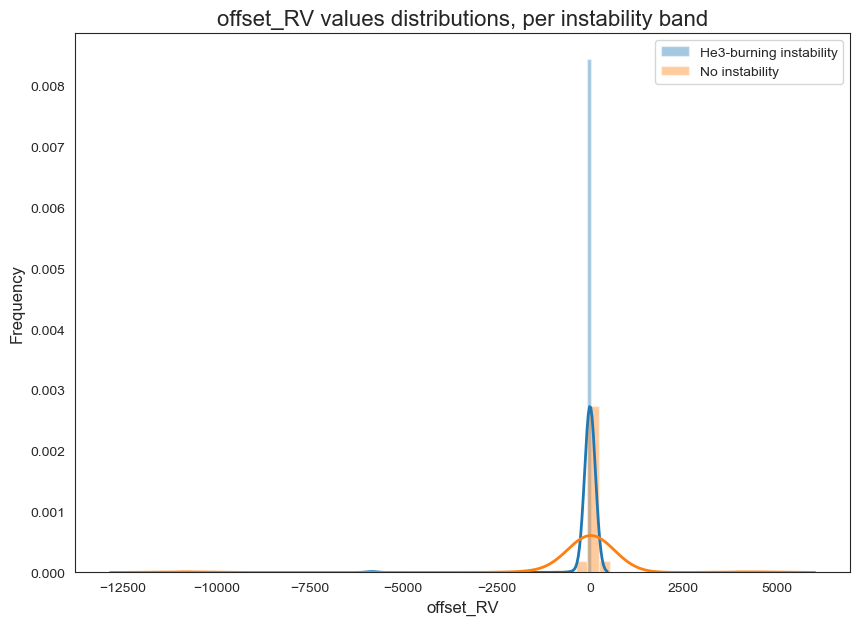

In [18]:
varname = 'offset_RV'
colname = 'offset_PG_RV'
img_id = "_07_"
compare_dist(d1=gto.loc[gto['InstBand_ranged'] == "He3-burning", colname],
             d2=gto.loc[gto['InstBand_ranged'] == "none", colname],
             d1_label="He3-burning instability", d2_label="No instability",
             varname=varname, category_name="instability band",
             fig_filename = IMAGE_FOLDER + "Analysis_11" + img_id + varname + "_vs_InstBand.jpg")


#### Detected offset distributions by instability band (TESS LC)

C:\Users\ciroe\AppData\Local\Temp\ipykernel_28280\4149133756.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1, label=d1_label, **kwargs)
C:\Users\ciroe\AppData\Local\Temp\ipykernel_28280\4149133756.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d2, label=d2_label, **kwargs)


stat=4.116, p=0.000
***Probably different distributions


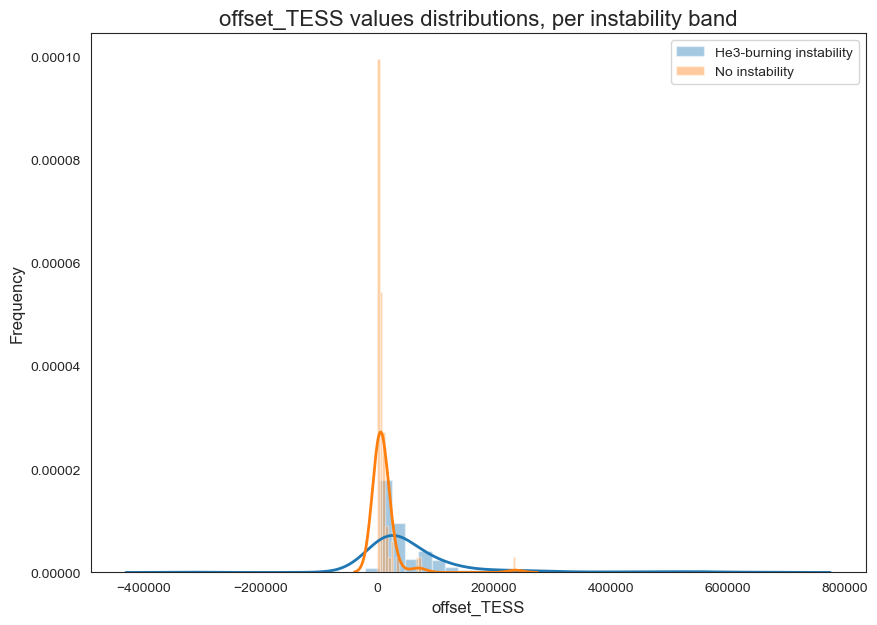

In [19]:
varname = 'offset_TESS'
colname = 'offset_PG_TESS'
img_id = "_08_"
compare_dist(d1=gto.loc[gto['InstBand_ranged'] == "He3-burning", colname],
             d2=gto.loc[gto['InstBand_ranged'] == "none", colname],
             d1_label="He3-burning instability", d2_label="No instability",
             varname=varname, category_name="instability band",
             fig_filename = IMAGE_FOLDER + "Analysis_11" + img_id + varname + "_vs_InstBand.jpg")

**CONCLUSION:** only for _amplitude_ (CARMENES RV curves periodograms) and for _offset_ (TESS light curves periodograms) we see significative differences between the samples inside the He3-burning instability band and outside the instability band.

### Scatter plots - Comparison of results between CARMENES and TESS curves

We need first to prepare an auxiliar dataset for the period, FAP, and frequency peak power.

#### Prepare data

In [20]:
print(list(gto.columns))

['Karmn', 'Name', 'Comp', 'GJ', 'RA_J2016_deg', 'DE_J2016_deg', 'RA_J2000', 'DE_J2000', 'l_J2016_deg', 'b_J2016_deg', 'Ref01', 'SpT', 'SpTnum', 'Ref02', 'Teff_K', 'eTeff_K', 'logg', 'elogg', '[Fe/H]', 'e[Fe/H]', 'Ref03', 'L_Lsol', 'eL_Lsol', 'Ref04', 'R_Rsol', 'eR_Rsol', 'Ref05', 'M_Msol', 'eM_Msol', 'Ref06', 'muRA_masa-1', 'emuRA_masa-1', 'muDE_masa-1', 'emuDE_masa-1', 'Ref07', 'pi_mas', 'epi_mas', 'Ref08', 'd_pc', 'ed_pc', 'Ref09', 'Vr_kms-1', 'eVr_kms-1', 'Ref10', 'ruwe', 'Ref11', 'U_kms-1', 'eU_kms-1', 'V_kms-1', 'eV_kms-1', 'W_kms-1', 'eW_kms-1', 'Ref12', 'sa_m/s/a', 'esa_m/s/a', 'Ref13', 'SKG', 'Ref14', 'SKG_lit', 'Ref14_lit', 'Pop', 'Ref15', 'vsini_flag', 'vsini_kms-1', 'evsini_kms-1', 'Ref16', 'P_d', 'eP_d', 'Ref17', 'pEWHalpha_A', 'epEWHalpha_A', 'Ref18', 'log(LHalpha/Lbol)', 'elog(LHalpha/Lbol)', 'Ref19', '1RXS', 'CRT_s-1', 'eCRT_s-1', 'HR1', 'eHR1', 'HR2', 'eHR2', 'Flux_X_E-13_ergcm-2s-1', 'eFlux_X_E-13_ergcm-2s-1', 'LX/LJ', 'eLX/LJ', 'Ref20', 'Activity', 'Ref21', 'FUV_mag',

In [21]:
rv_df = gto[['Karmn', 'InstBand_nominal',  'InstBand_ranged',
             'f_PG_RV', 'Pd_PG_RV', 'FAP_PG_RV', 'maxP_PG_RV']].copy()
rv_df.head()

,Karmn,InstBand_nominal,InstBand_ranged,f_PG_RV,Pd_PG_RV,FAP_PG_RV,maxP_PG_RV
0,J23548+385,none,none,204.35120,0.004894,0.470460,0.894423
1,J23505-095,He3-burning,He3-burning,163.85128,0.006103,0.251279,0.342583
2,J23431+365,none,He3-burning,271.16472,0.003688,0.015991,0.823166
3,J23381-162,He3-burning,He3-burning,95.36536,0.010486,0.964910,0.352708
4,J23245+578,He3-burning,He3-burning,268.09008,0.003730,0.061826,0.426394


In [22]:
rv_df['PG group'] = 'CARMENES RV'
rv_df.rename(columns={'f_PG_RV': 'f_PG', 'Pd_PG_RV': 'Pd_PG',
                      'FAP_PG_RV': 'FAP_PG', 'maxP_PG_RV': 'maxP_PG'},
              inplace=True)
rv_df.head()

,Karmn,InstBand_nominal,InstBand_ranged,f_PG,Pd_PG,FAP_PG,maxP_PG,PG group
0,J23548+385,none,none,204.35120,0.004894,0.470460,0.894423,CARMENES RV
1,J23505-095,He3-burning,He3-burning,163.85128,0.006103,0.251279,0.342583,CARMENES RV
2,J23431+365,none,He3-burning,271.16472,0.003688,0.015991,0.823166,CARMENES RV
3,J23381-162,He3-burning,He3-burning,95.36536,0.010486,0.964910,0.352708,CARMENES RV
4,J23245+578,He3-burning,He3-burning,268.09008,0.003730,0.061826,0.426394,CARMENES RV


In [23]:
tess_df = gto[['Karmn', 'InstBand_nominal',  'InstBand_ranged',
               'f_PG_TESS', 'Pd_PG_TESS', 'FAP_PG_TESS', 'maxP_PG_TESS']].copy()
tess_df['PG group'] = 'TESS LC'
tess_df.rename(columns={'f_PG_TESS': 'f_PG', 'Pd_PG_TESS': 'Pd_PG',
                        'FAP_PG_TESS': 'FAP_PG', 'maxP_PG_TESS': 'maxP_PG'},
              inplace=True)
tess_df.head()

,Karmn,InstBand_nominal,InstBand_ranged,f_PG,Pd_PG,FAP_PG,maxP_PG,PG group
0,J23548+385,none,none,3.798,0.263296,0.999855,0.001027,TESS LC
1,J23505-095,He3-burning,He3-burning,2.793,0.358038,0.049768,0.001304,TESS LC
2,J23431+365,none,He3-burning,4.290,0.233100,0.000484,0.002553,TESS LC
3,J23381-162,He3-burning,He3-burning,78.036,0.012815,0.065475,0.001273,TESS LC
4,J23245+578,He3-burning,He3-burning,3.183,0.314169,0.047001,0.001389,TESS LC


In [24]:
pg_df = pd.concat([rv_df, tess_df]).reset_index(drop=True)
pg_df

,Karmn,InstBand_nominal,InstBand_ranged,f_PG,Pd_PG,FAP_PG,maxP_PG,PG group
0,J23548+385,none,none,204.35120,0.004894,0.470460,0.894423,CARMENES RV
1,J23505-095,He3-burning,He3-burning,163.85128,0.006103,0.251279,0.342583,CARMENES RV
2,J23431+365,none,He3-burning,271.16472,0.003688,0.015991,0.823166,CARMENES RV
3,J23381-162,He3-burning,He3-burning,95.36536,0.010486,0.964910,0.352708,CARMENES RV
4,J23245+578,He3-burning,He3-burning,268.09008,0.003730,0.061826,0.426394,CARMENES RV
...,...,...,...,...,...,...,...,...
533,J00403+612,He3-burning,He3-burning,145.16400,0.006889,0.391819,0.001470,TESS LC
534,J00389+306,He3-burning,He3-burning,3.17100,0.315358,0.137090,0.001652,TESS LC
535,J00286-066,He3-burning,He3-burning,5.99700,0.166750,0.102948,0.001676,TESS LC
536,J00183+440,He3-burning,He3-burning,262.37700,0.003811,0.016769,0.001969,TESS LC


#### Detected period correlation

Pearson's correlation value: 0.053


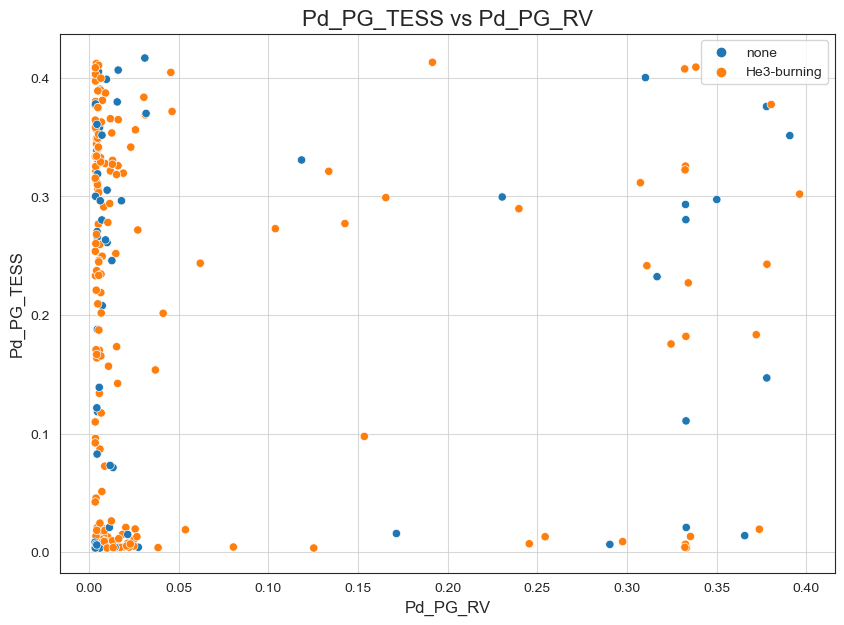

In [25]:
img_id = "_09_"
main_var = "Pd"
category_var = "InstBand_ranged"

rv_x_var = main_var + '_PG_RV'
tess_y_var = main_var + '_PG_TESS'
scatter_graph(data=gto, var_x=rv_x_var, var_y=tess_y_var,
              category_name=category_var,
              fig_filename=IMAGE_FOLDER + "Analysis_11" + img_id + main_var + "_correlation.jpg")
#def scatter_graph(data, var_x, var_y, category_name, fig_filename):

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Pearson's correlation value: 0.053


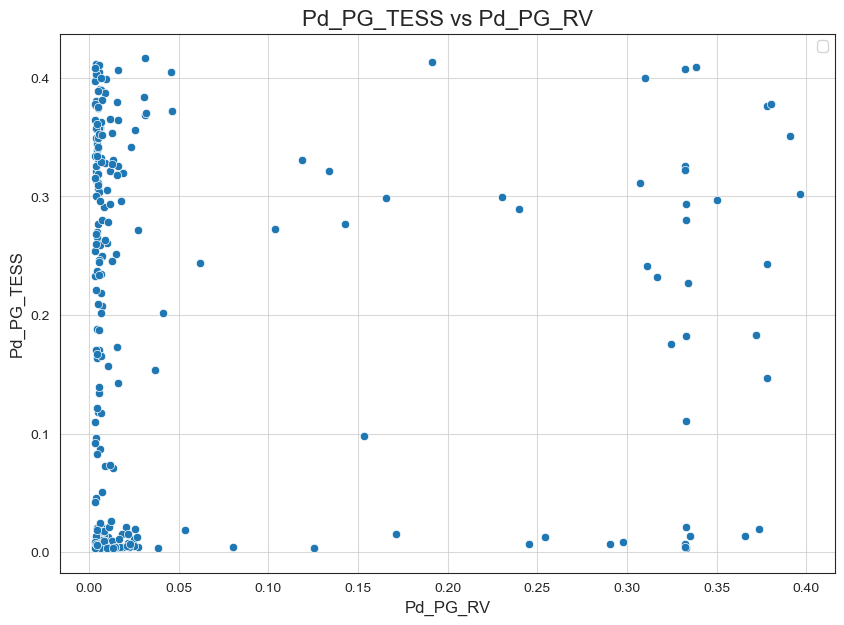

In [26]:
img_id = "_10_"
main_var = "Pd"
category_var = "InstBand_ranged"

rv_x_var = main_var + '_PG_RV'
tess_y_var = main_var + '_PG_TESS'
scatter_graph(data=gto, var_x=rv_x_var, var_y=tess_y_var,
              category_name=None,
              fig_filename=IMAGE_FOLDER + "Analysis_11" + img_id + main_var + "_correlation.jpg")
#def scatter_graph(data, var_x, var_y, category_name, fig_filename):

Pearson's correlation value: 0.053


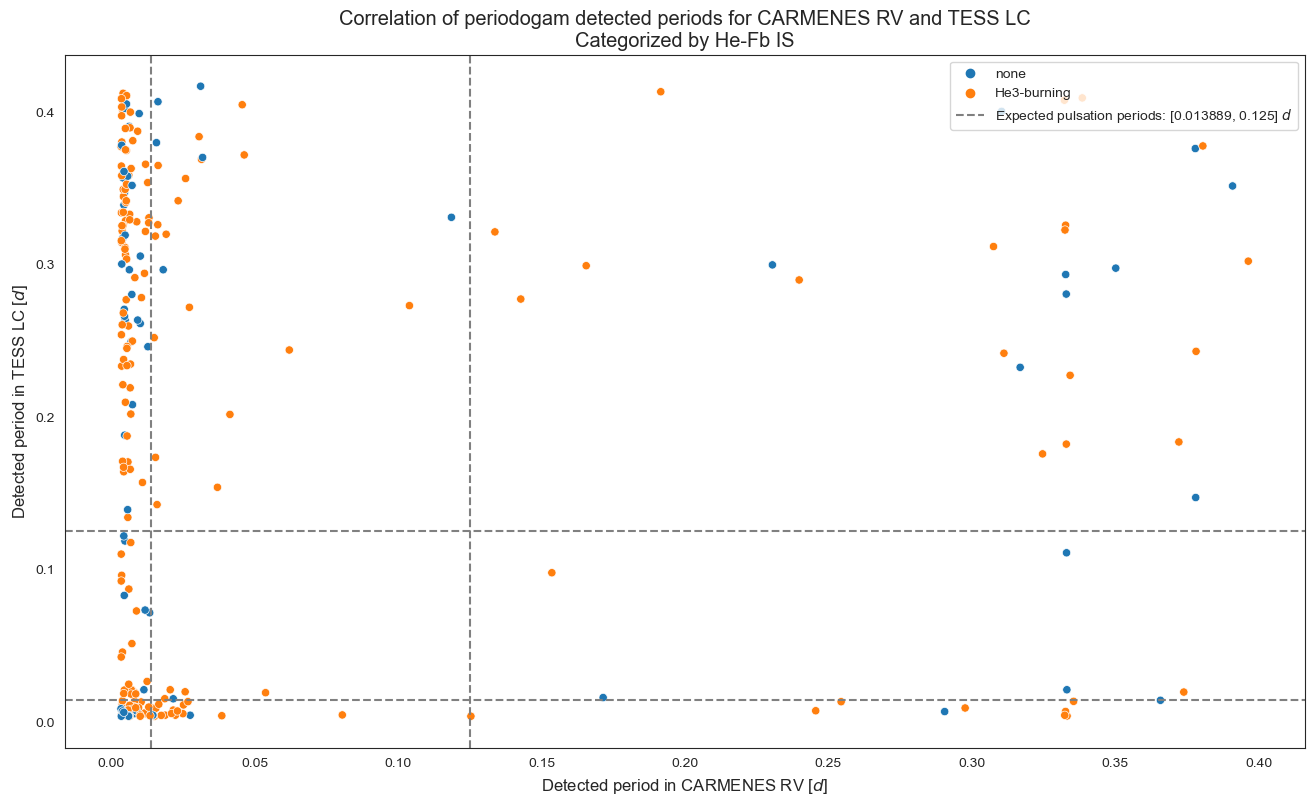

In [27]:
img_id = "_11_"
main_var = "Detected_Period"
category_var = "InstBand_ranged"
draw_scatter(data=gto, x='Pd_PG_RV', y='Pd_PG_TESS', hue=category_var,
             size=None, alpha=None,
             href_lines=[0.013889, 0.125], href_label="Expected pulsation periods: [0.013889, 0.125] $d$",
             href_color='gray', href_style='--',
             vref_lines=[0.013889, 0.125], vref_label=None,
             vref_color='gray', vref_style='--',
             title_override="Correlation of periodogam detected periods for CARMENES RV and TESS LC\n"
                 "Categorized by He-Fb IS",
             xlabel_override="Detected period in CARMENES RV [$d$]",
             ylabel_override="Detected period in TESS LC [$d$]",
             fig_filename=IMAGE_FOLDER + "Analysis_11" + img_id + main_var + "_correlation.jpg")

**OBSERVATION:** no correlation at all for detected periods.

#### Detected period distributions

In [28]:
print(list(pg_df.columns))

['Karmn', 'InstBand_nominal', 'InstBand_ranged', 'f_PG', 'Pd_PG', 'FAP_PG', 'maxP_PG', 'PG group']


C:\Users\ciroe\AppData\Local\Temp\ipykernel_28280\4149133756.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1, label=d1_label, **kwargs)
C:\Users\ciroe\AppData\Local\Temp\ipykernel_28280\4149133756.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d2, label=d2_label, **kwargs)


stat=-10.920, p=0.000
***Probably different distributions


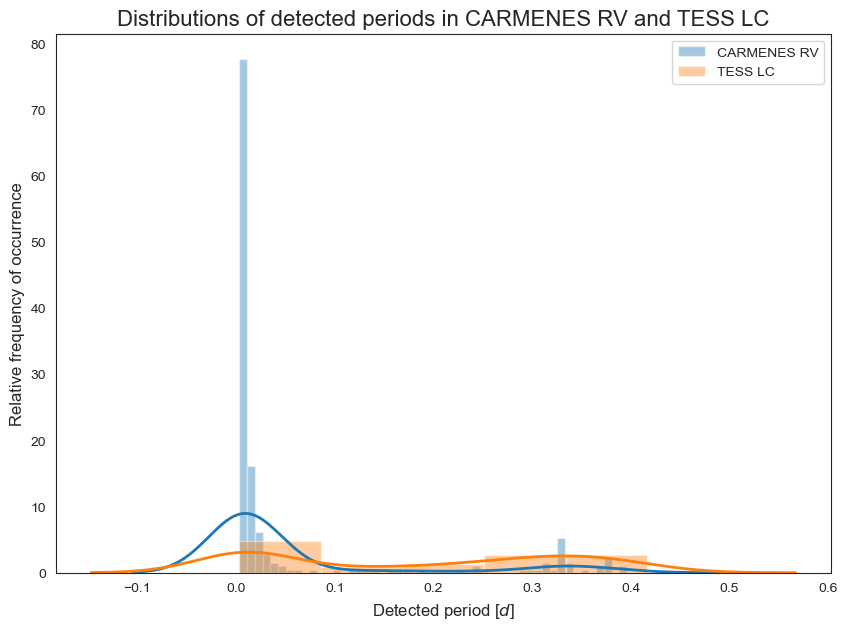

In [29]:
varname = 'Detected_Period_Distributions'
colname = 'Pd_PG'
img_id = "_12_"
compare_dist(d1=pg_df.loc[pg_df['PG group'] == "CARMENES RV", colname],
             d2=pg_df.loc[pg_df['PG group'] == "TESS LC", colname],
             d1_label="CARMENES RV", d2_label="TESS LC",
             varname=varname, category_name="PG group",
             title_override="Distributions of detected periods in CARMENES RV and TESS LC",
             xlabel_override="Detected period [$d$]",
             ylabel_override="Relative frequency of occurrence",
             fig_filename=IMAGE_FOLDER + "Analysis_11" + img_id + varname + ".jpg")

**CONCLUSION:** there seems to be no correlation at all between the periodogram results obtained for CARMENES RV curves and for TESS light curves. Additionally, it seems that the periods detected in RV time series tend to be always lower than the detected periods in the _TESS_ light curves, which confirms the conclusion reached with a visual comparison of the individual objects periodograms.

#### Detected frequency correlation

Pearson's correlation value: 0.002


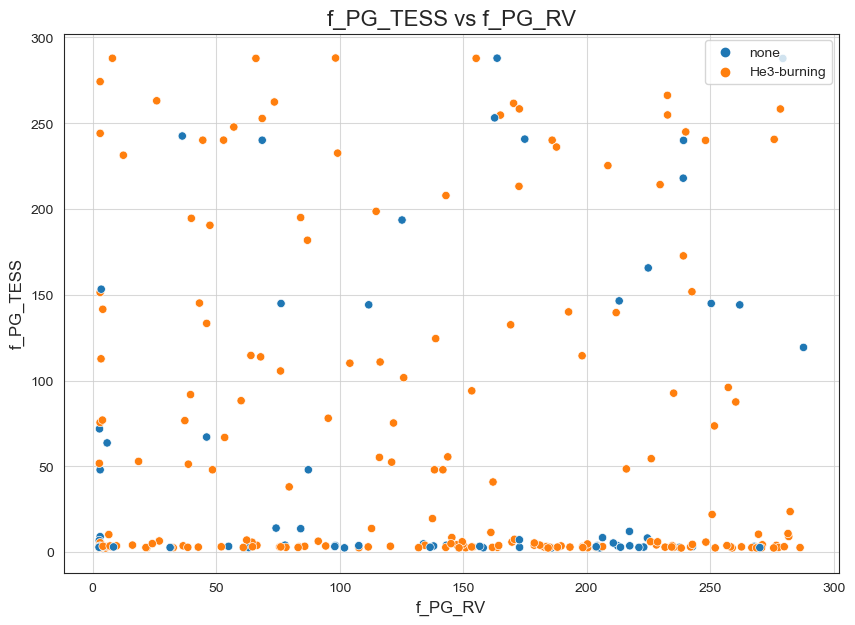

In [30]:
img_id = "_13_"
main_var = "f"
category_var = "InstBand_ranged"

rv_x_var = main_var + '_PG_RV'
tess_y_var = main_var + '_PG_TESS'
scatter_graph(data=gto, var_x=rv_x_var, var_y=tess_y_var,
              category_name=category_var,
              fig_filename=IMAGE_FOLDER + "Analysis_11" + img_id + main_var + "_correlation.jpg")
#def scatter_graph(data, var_x, var_y, category_name, fig_filename):

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Pearson's correlation value: 0.002


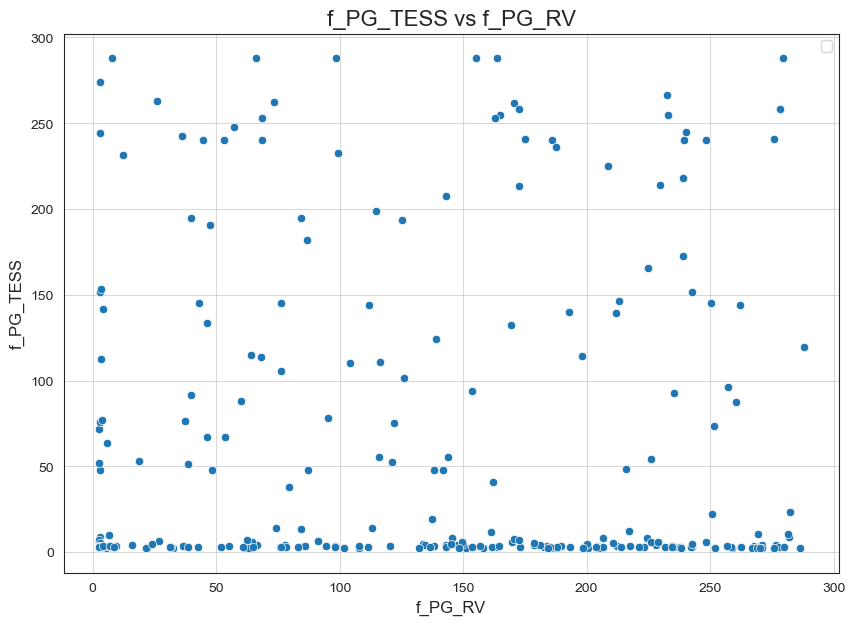

In [31]:
img_id = "_14_"
main_var = "f"
category_var = "InstBand_ranged"

rv_x_var = main_var + '_PG_RV'
tess_y_var = main_var + '_PG_TESS'
scatter_graph(data=gto, var_x=rv_x_var, var_y=tess_y_var,
              category_name=None,
              fig_filename=IMAGE_FOLDER + "Analysis_11" + img_id + main_var + "_correlation.jpg")
#def scatter_graph(data, var_x, var_y, category_name, fig_filename):

Pearson's correlation value: 0.002


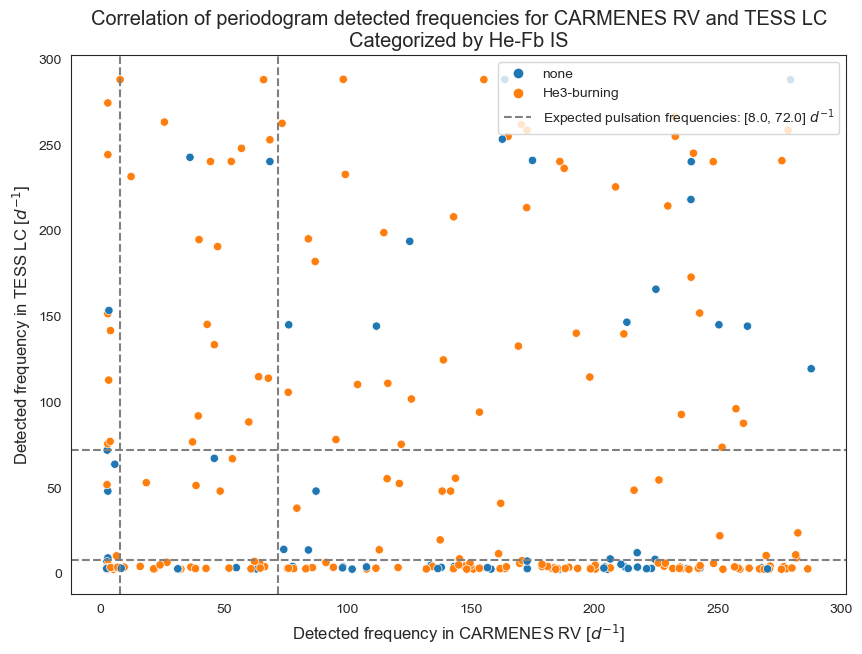

In [48]:
img_id = "_15_"
main_var = "Detected_Frequency"
category_var = "InstBand_ranged"
draw_scatter(data=gto, x='f_PG_RV', y='f_PG_TESS', hue=category_var,
             size=None, alpha=None,
             href_lines=[8.0, 72.0], href_label="Expected pulsation frequencies: [8.0, 72.0] $d^{-1}$",
             href_color='gray', href_style='--',
             vref_lines=[8.0, 72.0], vref_label=None,
             vref_color='gray', vref_style='--',
             title_override="Correlation of periodogram detected frequencies for CARMENES RV and TESS LC\n"
                 "Categorized by He-Fb IS",
             xlabel_override="Detected frequency in CARMENES RV [$d^{-1}$]",
             ylabel_override="Detected frequency in TESS LC [$d^{-1}$]",
             fig_filename=IMAGE_FOLDER + "Analysis_11" + img_id + main_var + "_correlation.jpg")

**OBSERVATION:** no correlation at all for detected frequencies. Additionally, most points are located in the bottom of the area, which reinforces the idea that the periodogram calculated from the _TESS_ light curves tend to yield lower frequency values than the periodograms calculated from the CARMENES RV time series. Also, most of the points fall out of the expected (or searched for) pulsation frequencies, and only in 5 cases both CARMENES and TESS calculations yield frequencies inside the expected range, with only 1 of them giving similar values.

##### Stars with detected frequencies in the range for both _TESS_ and CARMENES

In [33]:
print(list(gto.columns))

['Karmn', 'Name', 'Comp', 'GJ', 'RA_J2016_deg', 'DE_J2016_deg', 'RA_J2000', 'DE_J2000', 'l_J2016_deg', 'b_J2016_deg', 'Ref01', 'SpT', 'SpTnum', 'Ref02', 'Teff_K', 'eTeff_K', 'logg', 'elogg', '[Fe/H]', 'e[Fe/H]', 'Ref03', 'L_Lsol', 'eL_Lsol', 'Ref04', 'R_Rsol', 'eR_Rsol', 'Ref05', 'M_Msol', 'eM_Msol', 'Ref06', 'muRA_masa-1', 'emuRA_masa-1', 'muDE_masa-1', 'emuDE_masa-1', 'Ref07', 'pi_mas', 'epi_mas', 'Ref08', 'd_pc', 'ed_pc', 'Ref09', 'Vr_kms-1', 'eVr_kms-1', 'Ref10', 'ruwe', 'Ref11', 'U_kms-1', 'eU_kms-1', 'V_kms-1', 'eV_kms-1', 'W_kms-1', 'eW_kms-1', 'Ref12', 'sa_m/s/a', 'esa_m/s/a', 'Ref13', 'SKG', 'Ref14', 'SKG_lit', 'Ref14_lit', 'Pop', 'Ref15', 'vsini_flag', 'vsini_kms-1', 'evsini_kms-1', 'Ref16', 'P_d', 'eP_d', 'Ref17', 'pEWHalpha_A', 'epEWHalpha_A', 'Ref18', 'log(LHalpha/Lbol)', 'elog(LHalpha/Lbol)', 'Ref19', '1RXS', 'CRT_s-1', 'eCRT_s-1', 'HR1', 'eHR1', 'HR2', 'eHR2', 'Flux_X_E-13_ergcm-2s-1', 'eFlux_X_E-13_ergcm-2s-1', 'LX/LJ', 'eLX/LJ', 'Ref20', 'Activity', 'Ref21', 'FUV_mag',

In [34]:
mask = (gto['f_PG_RV'] > 8.0) & (gto['f_PG_RV'] < 72.0) & \
    (gto['f_PG_TESS'] > 8.0) & (gto['f_PG_TESS'] < 72.0)
stars_of_interest = gto.loc[mask, ['Karmn', 'f_PG_RV', 'f_PG_TESS', 'A_PG_RV', 'A_PG_TESS']].copy()
stars_of_interest.rename(
    columns={
        'Karmn': 'Star',
        'f_PG_RV': '$f_{det}$ RV',
        'f_PG_TESS': '$f_{det}$ TESS',
        'A_PG_RV': '$A_{det}$ RV [$m\;s^{-1}$]',
        'A_PG_TESS': '$A_{det}$ TESS [$e\;s^{-1}$]'
    },
    inplace=True)
stars_of_interest

,Star,$f_{det}$ RV,$f_{det}$ TESS,$A_{det}$ RV [$m\;s^{-1}$],$A_{det}$ TESS [$e\;s^{-1}$]
66,J16167+672N,48.49968,48.000,1.965388,57459.764842
80,J13582+125,53.42840,66.846,12.000248,1.004492
84,J13450+176,38.72048,51.267,2.764744,2.243922
163,J08599+729,46.11624,67.086,9.927070,0.469360
168,J08402+314,18.56944,52.890,3.071410,0.971945


In [35]:
stars_of_interest.columns

Index(['Star', '$f_{det}$ RV', '$f_{det}$ TESS', '$A_{det}$ RV [$m\;s^{-1}$]',
       '$A_{det}$ TESS [$e\;s^{-1}$]'],
      dtype='object')

In [36]:
stars_of_interest.loc[:, ['$f_{det}$ RV', '$f_{det}$ TESS',
                          '$A_{det}$ RV [$m\;s^{-1}$]','$A_{det}$ TESS [$e\;s^{-1}$]']] = \
    stars_of_interest.loc[:, ['$f_{det}$ RV', '$f_{det}$ TESS',
                              '$A_{det}$ RV [$m\;s^{-1}$]','$A_{det}$ TESS [$e\;s^{-1}$]']] \
    .apply(lambda x: np.round(x, 2))
stars_of_interest

,Star,$f_{det}$ RV,$f_{det}$ TESS,$A_{det}$ RV [$m\;s^{-1}$],$A_{det}$ TESS [$e\;s^{-1}$]
66,J16167+672N,48.50,48.00,1.97,57459.76
80,J13582+125,53.43,66.85,12.00,1.00
84,J13450+176,38.72,51.27,2.76,2.24
163,J08599+729,46.12,67.09,9.93,0.47
168,J08402+314,18.57,52.89,3.07,0.97


In [37]:
stars_of_interest.columns

Index(['Star', '$f_{det}$ RV', '$f_{det}$ TESS', '$A_{det}$ RV [$m\;s^{-1}$]',
       '$A_{det}$ TESS [$e\;s^{-1}$]'],
      dtype='object')

In [38]:
# Save to file:
stars_of_interest.to_csv(INTEREST_STARS_OUT, sep=',', decimal='.', index=False)

In [39]:
# NEW VERSION FOR 'to_latex':
print(stars_of_interest.style.hide(axis="index").to_latex(
        caption=("Stars of interest from a periodogram perspective.",
                 "Stars of interest from a periodogram perspective.")))

\begin{table}
\caption[Stars of interest from a periodogram perspective.]{Stars of interest from a periodogram perspective.}
\begin{tabular}{lrrrr}
Star & $f_{det}$ RV & $f_{det}$ TESS & $A_{det}$ RV [$m\;s^{-1}$] & $A_{det}$ TESS [$e\;s^{-1}$] \\
J16167+672N & 48.500000 & 48.000000 & 1.970000 & 57459.760000 \\
J13582+125 & 53.430000 & 66.850000 & 12.000000 & 1.000000 \\
J13450+176 & 38.720000 & 51.270000 & 2.760000 & 2.240000 \\
J08599+729 & 46.120000 & 67.090000 & 9.930000 & 0.470000 \\
J08402+314 & 18.570000 & 52.890000 & 3.070000 & 0.970000 \\
\end{tabular}
\end{table}



In [40]:
# Save to file:
# Write to file:
# Backup the standard output:
original_stdout = sys.stdout
with open(LATEX_INTEREST_STARS_OUT, 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    print(stars_of_interest.style.hide(axis="index").to_latex(
        caption=("Stars of interest from a periodogram perspective.",
                 "Stars of interest from a periodogram perspective.")))
# Restore the standard output to its original value
sys.stdout = original_stdout

#### Detected frequency distributions

In [41]:
print(list(pg_df.columns))

['Karmn', 'InstBand_nominal', 'InstBand_ranged', 'f_PG', 'Pd_PG', 'FAP_PG', 'maxP_PG', 'PG group']


stat=8.967, p=0.000
***Probably different distributions


C:\Users\ciroe\AppData\Local\Temp\ipykernel_20568\4149133756.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1, label=d1_label, **kwargs)
C:\Users\ciroe\AppData\Local\Temp\ipykernel_20568\4149133756.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d2, label=d2_label, **kwargs)


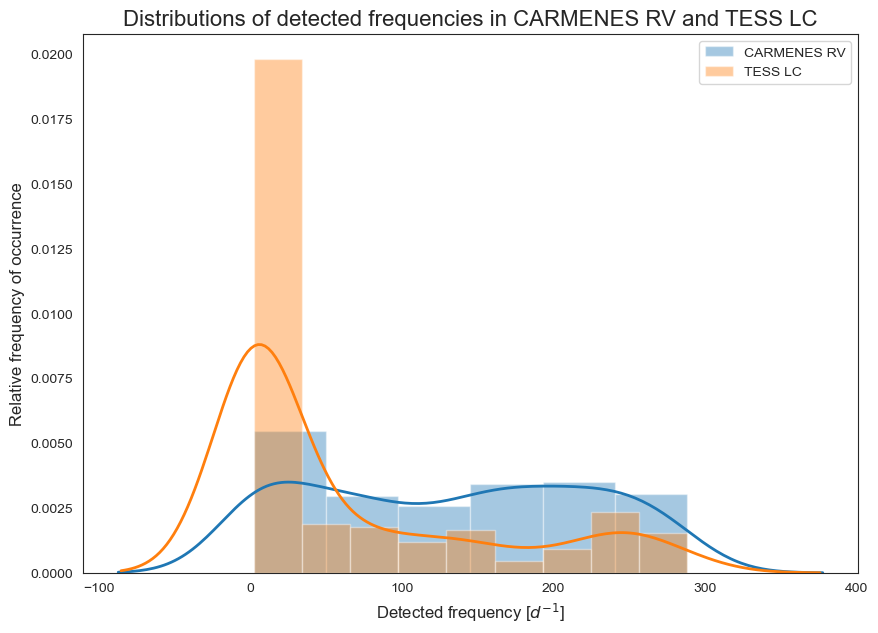

In [42]:
varname = 'Detected_Frequency_Distributions'
colname = 'f_PG'
img_id = "_16_"
compare_dist(d1=pg_df.loc[pg_df['PG group'] == "CARMENES RV", colname],
             d2=pg_df.loc[pg_df['PG group'] == "TESS LC", colname],
             d1_label="CARMENES RV", d2_label="TESS LC",
             varname=varname, category_name="PG group",
             title_override="Distributions of detected frequencies in CARMENES RV and TESS LC",
             xlabel_override="Detected frequency [$d^{-1}$]",
             ylabel_override="Relative frequency of occurrence",
             fig_filename=IMAGE_FOLDER + "Analysis_11" + img_id + varname + ".jpg")

**CONCLUSION:** there seems to be no correlation at all between the periodogram results obtained for CARMENES RV curves and for TESS light curves. Additionally, it seems that the frequencies detected in RV time series tend to be always higher than the detected periods in the _TESS_ light curves, which confirms the conclusion reached with a visual comparison of the individual objects periodograms.

#### Amplitudes - Not applicable

**Note:** amplitudes and offsets are **not** directly comparable (we cannot compare radial velocities with photometric data).

#### Periodogram peak power correlation

Pearson's correlation value: 0.025


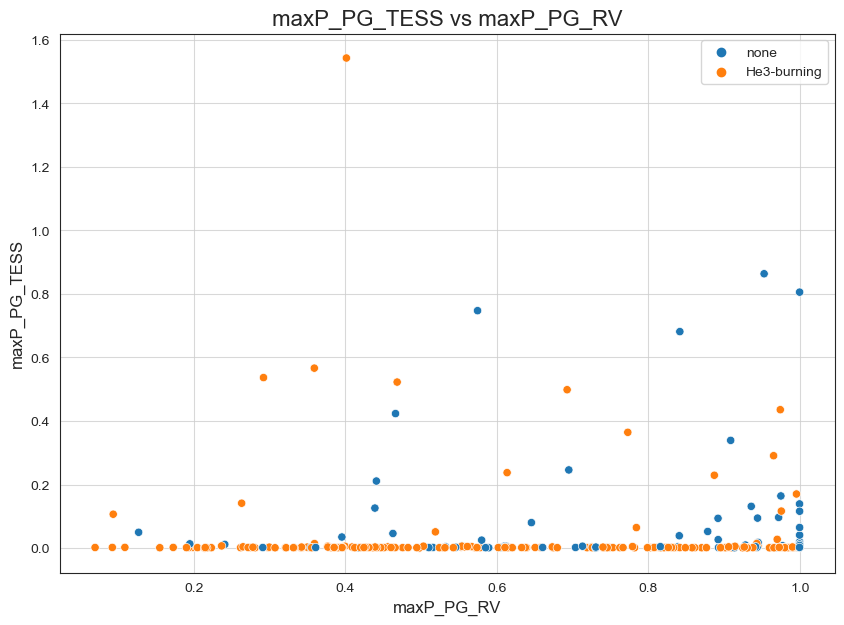

In [43]:
img_id = "_17_"
main_var = "maxP"
category_var = "InstBand_ranged"

rv_x_var = main_var + '_PG_RV'
tess_y_var = main_var + '_PG_TESS'
scatter_graph(data=gto, var_x=rv_x_var, var_y=tess_y_var,
              category_name=category_var,
              fig_filename=IMAGE_FOLDER + "Analysis_11" + img_id + main_var + "_correlation.jpg")
#def scatter_graph(data, var_x, var_y, category_name, fig_filename):

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Pearson's correlation value: 0.025


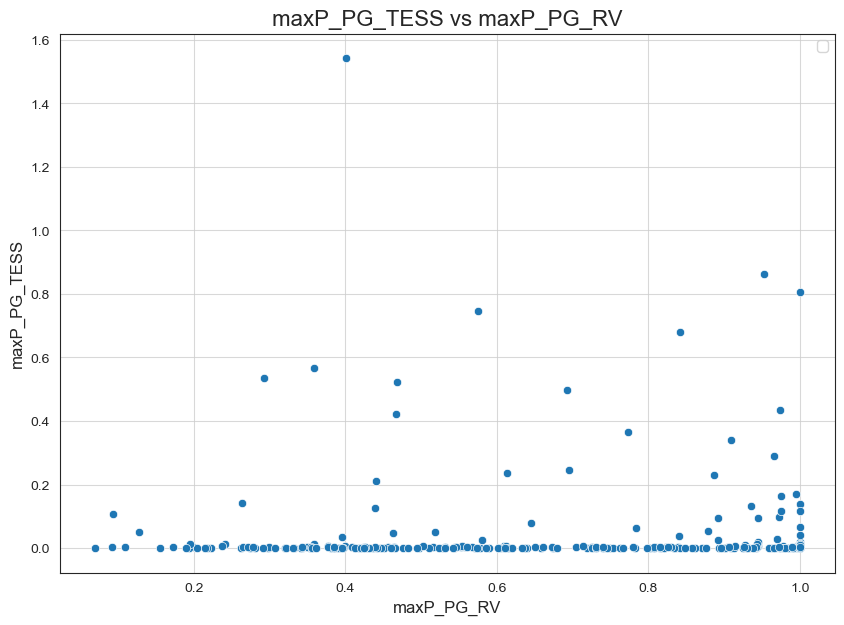

In [44]:
img_id = "_18_"
main_var = "maxP"
category_var = "InstBand_ranged"

rv_x_var = main_var + '_PG_RV'
tess_y_var = main_var + '_PG_TESS'
scatter_graph(data=gto, var_x=rv_x_var, var_y=tess_y_var,
              category_name=None,
              fig_filename=IMAGE_FOLDER + "Analysis_11" + img_id + main_var + "_correlation.jpg")
#def scatter_graph(data, var_x, var_y, category_name, fig_filename):

Pearson's correlation value: 0.025


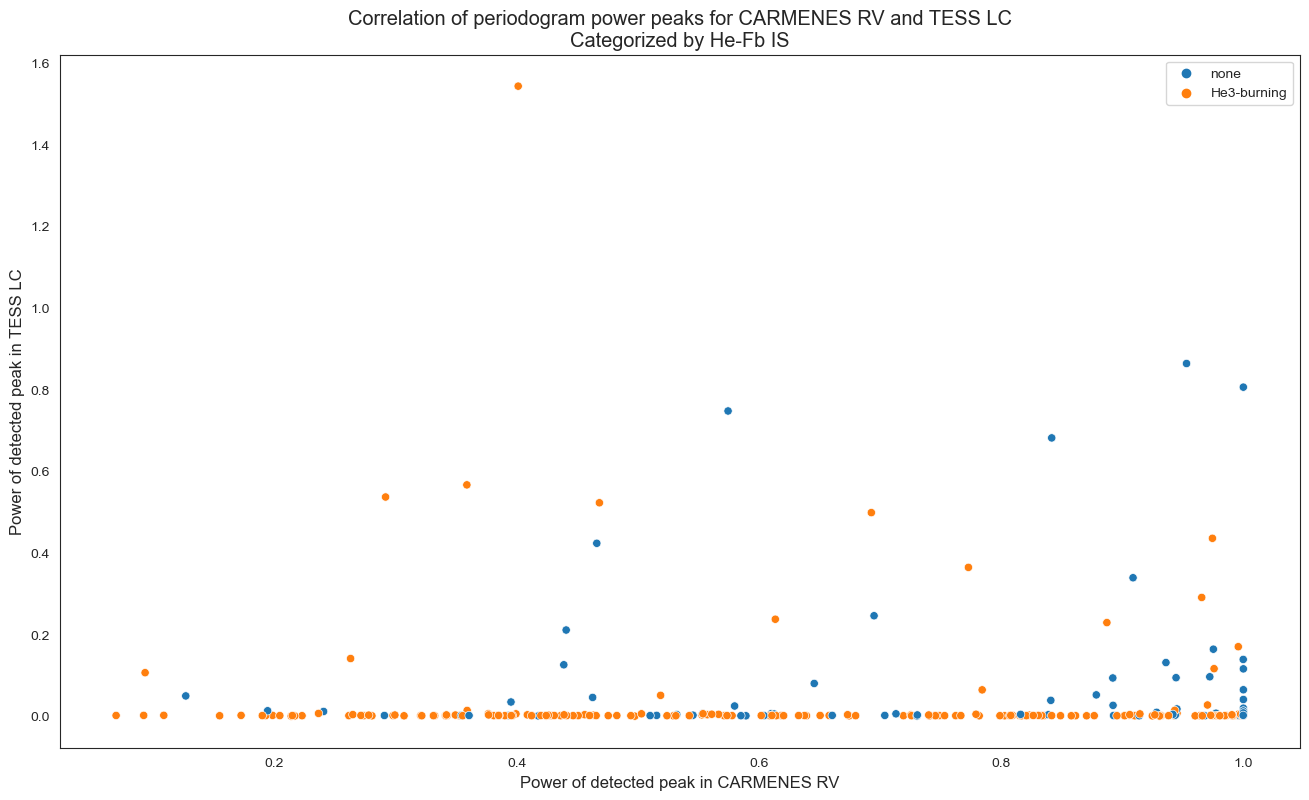

In [45]:
img_id = "_19_"
main_var = "Power_peak"
category_var = "InstBand_ranged"
draw_scatter(data=gto, x='maxP_PG_RV', y='maxP_PG_TESS', hue=category_var,
             size=None, alpha=None,
             href_lines=[], href_label=None, href_color=None, href_style=None,
             vref_lines=[], vref_label=None, vref_color=None, vref_style=None,
             title_override="Correlation of periodogram power peaks for CARMENES RV and TESS LC\n"
                 "Categorized by He-Fb IS",
             xlabel_override="Power of detected peak in CARMENES RV",
             ylabel_override="Power of detected peak in TESS LC",
             fig_filename=IMAGE_FOLDER + "Analysis_11" + img_id + main_var + "_correlation.jpg")

**OBSERVATION:** no correlation at all for detected peak power. Additionally, most points are located in the bottom of the area, which confirms the fact that the periodogram calculated from the _TESS_ light curves tend to yield muck lower peak power than the periodograms calculated from the CARMENES RV time series. **DOUBT: What is the reason for this, if the periodograms are normalized?***

#### Periodogram peak power distributions

In [46]:
print(list(pg_df.columns))

['Karmn', 'InstBand_nominal', 'InstBand_ranged', 'f_PG', 'Pd_PG', 'FAP_PG', 'maxP_PG', 'PG group']


C:\Users\ciroe\AppData\Local\Temp\ipykernel_20568\4149133756.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1, label=d1_label, **kwargs)
C:\Users\ciroe\AppData\Local\Temp\ipykernel_20568\4149133756.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d2, label=d2_label, **kwargs)


stat=32.263, p=0.000
***Probably different distributions


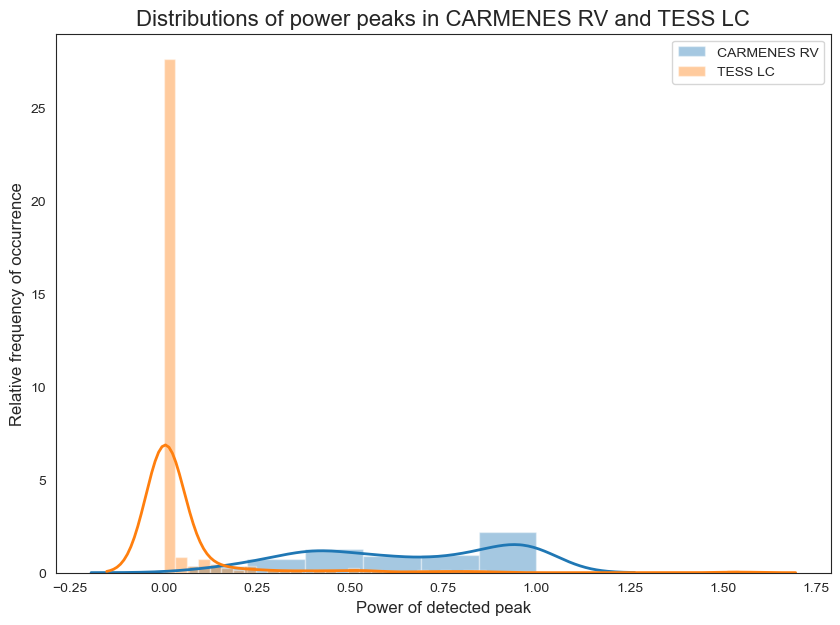

In [47]:
varname = 'Peak_Power_Distributions'
colname = 'maxP_PG'
img_id = "_20_"
compare_dist(d1=pg_df.loc[pg_df['PG group'] == "CARMENES RV", colname],
             d2=pg_df.loc[pg_df['PG group'] == "TESS LC", colname],
             d1_label="CARMENES RV", d2_label="TESS LC",
             varname=varname, category_name="PG group",
             title_override="Distributions of power peaks in CARMENES RV and TESS LC",
             xlabel_override="Power of detected peak",
             ylabel_override="Relative frequency of occurrence",
             fig_filename=IMAGE_FOLDER + "Analysis_11" + img_id + varname + ".jpg")

**CONCLUSION:** there seems to be no correlation at all between the periodogram results obtained for CARMENES RV curves and for TESS light curves. Additionally, it is clear that the periodogram peak power in RV time series is much higher than the value obtained in the _TESS_ light curves, which confirms the conclusion reached with a visual comparison of the individual objects periodograms. **However, we still do not know the cause for this.*** 

#### FAP correlation

Pearson's correlation value: 0.034


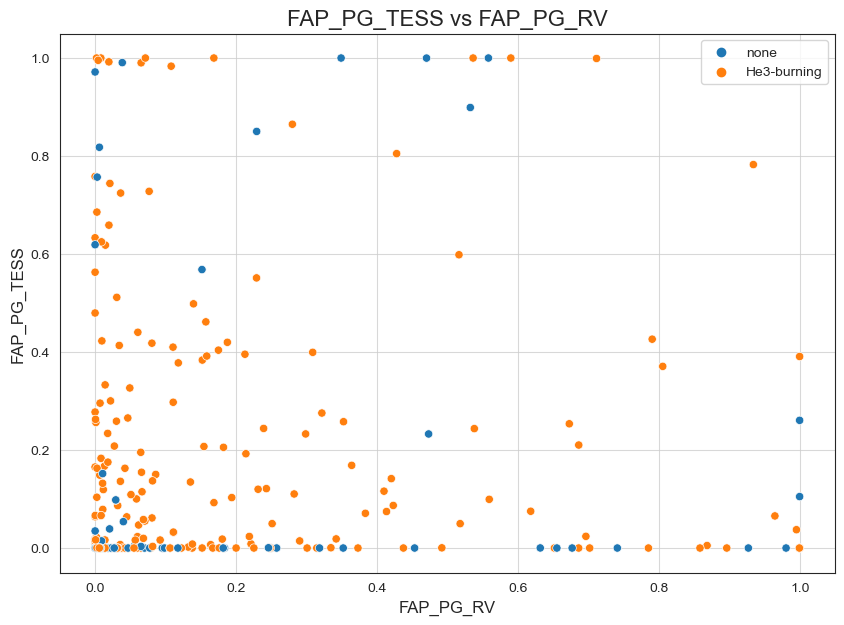

In [48]:
img_id = "_21_"
main_var = "FAP"
category_var = "InstBand_ranged"

rv_x_var = main_var + '_PG_RV'
tess_y_var = main_var + '_PG_TESS'
scatter_graph(data=gto[[rv_x_var, tess_y_var, category_var]].dropna(), var_x=rv_x_var, var_y=tess_y_var,
              category_name=category_var,
              fig_filename=IMAGE_FOLDER + "Analysis_11" + img_id + main_var + "_correlation.jpg")
#def scatter_graph(data, var_x, var_y, category_name, fig_filename):

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Pearson's correlation value: 0.034


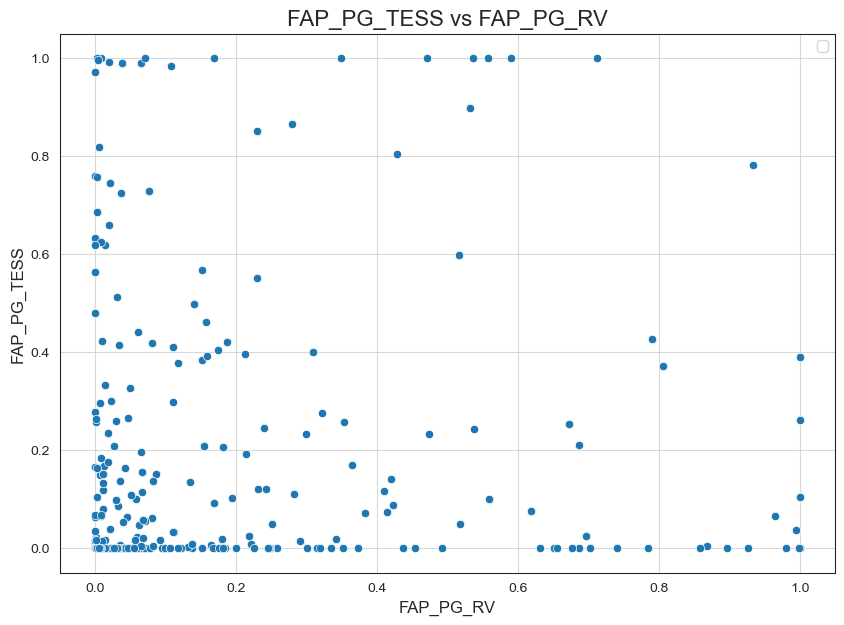

In [49]:
img_id = "_22_"
main_var = "FAP"
category_var = "InstBand_ranged"

rv_x_var = main_var + '_PG_RV'
tess_y_var = main_var + '_PG_TESS'
scatter_graph(data=gto[[rv_x_var, tess_y_var, category_var]].dropna(), var_x=rv_x_var, var_y=tess_y_var,
              category_name=None,
              fig_filename=IMAGE_FOLDER + "Analysis_11" + img_id + main_var + "_correlation.jpg")
#def scatter_graph(data, var_x, var_y, category_name, fig_filename):

Pearson's correlation value: 0.034


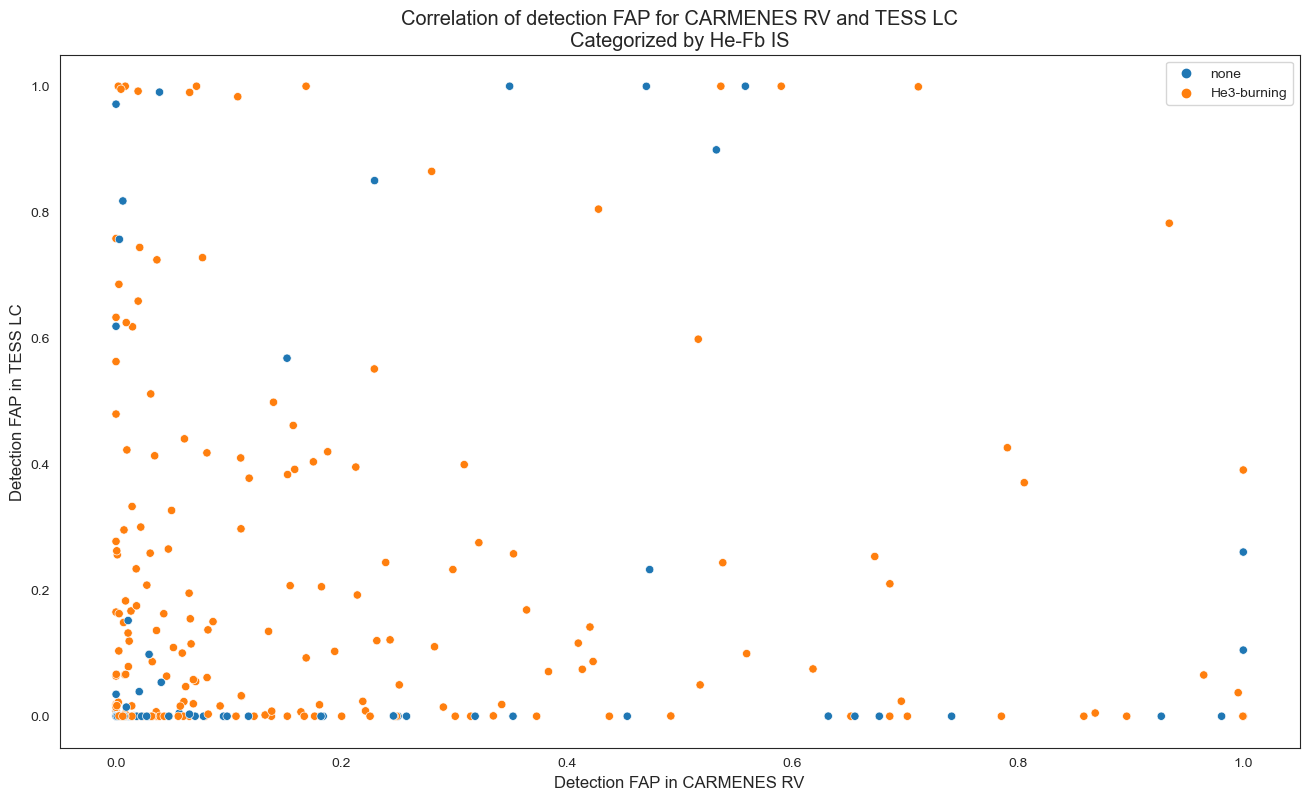

In [50]:
img_id = "_23_"
main_var = "FAP"
category_var = "InstBand_ranged"
draw_scatter(data=gto.dropna(subset=['FAP_PG_RV', 'FAP_PG_TESS']),
             x='FAP_PG_RV', y='FAP_PG_TESS', hue=category_var,
             size=None, alpha=None,
             href_lines=[], href_label=None, href_color=None, href_style=None,
             vref_lines=[], vref_label=None, vref_color=None, vref_style=None,
             title_override="Correlation of detection FAP for CARMENES RV and TESS LC\n"
                 "Categorized by He-Fb IS",
             xlabel_override="Detection FAP in CARMENES RV",
             ylabel_override="Detection FAP in TESS LC",
             fig_filename=IMAGE_FOLDER + "Analysis_11" + img_id + main_var + "_correlation.jpg")

**OBSERVATION:** as we can see, there is no correlation at all between the FAP values of CARMENES RV periodograms and TESS LC periodograms.

#### FAP distributions

In [51]:
print(list(pg_df.columns))

['Karmn', 'InstBand_nominal', 'InstBand_ranged', 'f_PG', 'Pd_PG', 'FAP_PG', 'maxP_PG', 'PG group']


stat=0.002, p=0.998
Probably the same distribution


C:\Users\ciroe\AppData\Local\Temp\ipykernel_20568\4149133756.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1, label=d1_label, **kwargs)
C:\Users\ciroe\AppData\Local\Temp\ipykernel_20568\4149133756.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d2, label=d2_label, **kwargs)


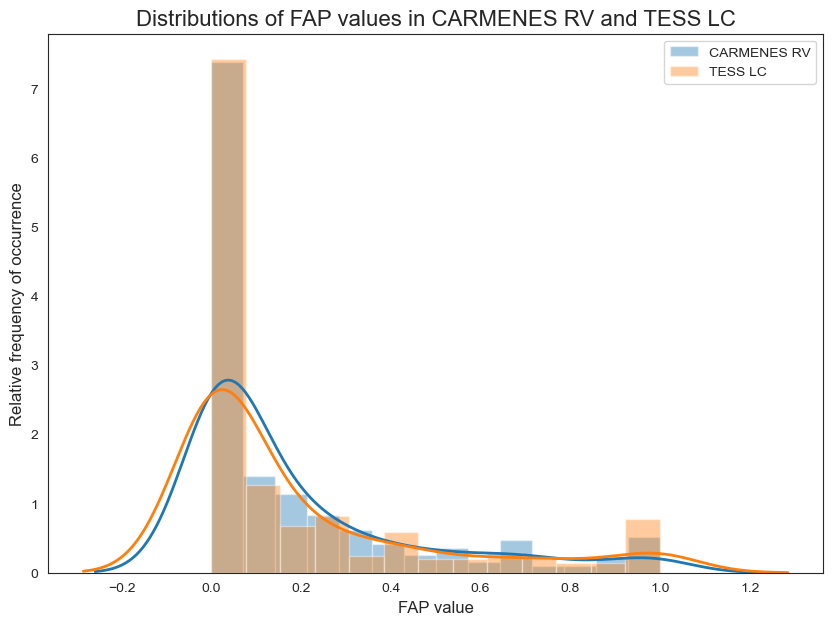

In [52]:
varname = 'FAP_Distributions'
colname = 'FAP_PG'
img_id = "_24_"
compare_dist(d1=pg_df.loc[pg_df['PG group'] == "CARMENES RV", colname].dropna(),
             d2=pg_df.loc[pg_df['PG group'] == "TESS LC", colname].dropna(),
             d1_label="CARMENES RV", d2_label="TESS LC",
             varname=varname, category_name="PG group",
             title_override="Distributions of FAP values in CARMENES RV and TESS LC",
             xlabel_override="FAP value",
             ylabel_override="Relative frequency of occurrence",
             fig_filename=IMAGE_FOLDER + "Analysis_11" + img_id + varname + ".jpg")

**CONCLUSION:** although there seems to be no correlation at all between the FAP results obtained for CARMENES RV curves and for TESS light curves, the distributions of the values for both groups look pretty similar to each other. That is to say, we are getting similar distributions of the FAP, but not getting the same values for each object.

### Sampling statistics

In [53]:
gto.head()

,Karmn,Name,Comp,GJ,RA_J2016_deg,DE_J2016_deg,RA_J2000,DE_J2000,l_J2016_deg,b_J2016_deg,...,WF_offset_PG_TESS,WF_e_offset_PG_TESS,WF_FAP_PG_TESS,WF_valid_PG_TESS,WF_error_PG_TESS,WF_elapsed_time_PG_TESS,WF_plain_file_TESS,WF_fig_file_TESS,PG_file_RV,PG_file_TESS
0,J23548+385,RX J2354.8+3831,-,NaN,358.713658,38.526340,23:54:51.46,+38:31:36.2,110.941908,-23.024449,...,999.999756,2.151008e-06,1.0,1.0,NaN,94.758838,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23548+38...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...,../data/CARM_VIS_RVs_PGs/J23548+385_RV_PG.dat,../data/CARM_VIS_TESS_PGs/J23548+385_RV_PG.dat
1,J23505-095,LP 763-012,-,4367,357.634705,-9.560964,23:50:31.64,-09:33:32.7,80.777067,-67.303426,...,1000.000122,9.022946e-07,1.0,1.0,NaN,132.607176,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23505-09...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...,../data/CARM_VIS_RVs_PGs/J23505-095_RV_PG.dat,../data/CARM_VIS_TESS_PGs/J23505-095_RV_PG.dat
2,J23431+365,GJ 1289,-,1289,355.781509,36.536310,23:43:06.31,+36:32:13.1,107.922839,-24.336479,...,999.999512,4.306074e-06,1.0,1.0,NaN,97.939914,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23431+36...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...,../data/CARM_VIS_RVs_PGs/J23431+365_RV_PG.dat,../data/CARM_VIS_TESS_PGs/J23431+365_RV_PG.dat
3,J23381-162,G 273-093,-,4352,354.532687,-16.236514,23:38:08.16,-16:14:10.2,61.845437,-69.825220,...,1000.000122,9.022946e-07,1.0,1.0,NaN,136.603404,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23381-16...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...,../data/CARM_VIS_RVs_PGs/J23381-162_RV_PG.dat,../data/CARM_VIS_TESS_PGs/J23381-162_RV_PG.dat
4,J23245+578,BD+57 2735,-,895,351.126628,57.853057,23:24:30.51,+57:51:15.5,111.552287,-3.085183,...,999.999512,3.720858e-06,1.0,1.0,NaN,131.327304,../data/CARM_VIS_TESS_WinFunc_PGs/WF_J23245+57...,../data/CARM_VIS_TESS_WinFunc_PGs/figures/WF_J...,../data/CARM_VIS_RVs_PGs/J23245+578_RV_PG.dat,../data/CARM_VIS_TESS_PGs/J23245+578_RV_PG.dat


In [54]:
print(list(gto.columns))

['Karmn', 'Name', 'Comp', 'GJ', 'RA_J2016_deg', 'DE_J2016_deg', 'RA_J2000', 'DE_J2000', 'l_J2016_deg', 'b_J2016_deg', 'Ref01', 'SpT', 'SpTnum', 'Ref02', 'Teff_K', 'eTeff_K', 'logg', 'elogg', '[Fe/H]', 'e[Fe/H]', 'Ref03', 'L_Lsol', 'eL_Lsol', 'Ref04', 'R_Rsol', 'eR_Rsol', 'Ref05', 'M_Msol', 'eM_Msol', 'Ref06', 'muRA_masa-1', 'emuRA_masa-1', 'muDE_masa-1', 'emuDE_masa-1', 'Ref07', 'pi_mas', 'epi_mas', 'Ref08', 'd_pc', 'ed_pc', 'Ref09', 'Vr_kms-1', 'eVr_kms-1', 'Ref10', 'ruwe', 'Ref11', 'U_kms-1', 'eU_kms-1', 'V_kms-1', 'eV_kms-1', 'W_kms-1', 'eW_kms-1', 'Ref12', 'sa_m/s/a', 'esa_m/s/a', 'Ref13', 'SKG', 'Ref14', 'SKG_lit', 'Ref14_lit', 'Pop', 'Ref15', 'vsini_flag', 'vsini_kms-1', 'evsini_kms-1', 'Ref16', 'P_d', 'eP_d', 'Ref17', 'pEWHalpha_A', 'epEWHalpha_A', 'Ref18', 'log(LHalpha/Lbol)', 'elog(LHalpha/Lbol)', 'Ref19', '1RXS', 'CRT_s-1', 'eCRT_s-1', 'HR1', 'eHR1', 'HR2', 'eHR2', 'Flux_X_E-13_ergcm-2s-1', 'eFlux_X_E-13_ergcm-2s-1', 'LX/LJ', 'eLX/LJ', 'Ref20', 'Activity', 'Ref21', 'FUV_mag',

### Addendum - `ppm` calculations for TESS (for RMS and detected amplitude)

In [55]:
gto[['Karmn', 'wmean_TESS', 'wrms_TESS', 'A_PG_TESS']].head()

,Karmn,wmean_TESS,wrms_TESS,A_PG_TESS
0,J23548+385,8262.208008,155.016525,7.023621
1,J23505-095,7767.134766,12.764067,0.652788
2,J23431+365,16158.291016,18.692959,1.337993
3,J23381-162,30353.148438,23.705412,1.196022
4,J23245+578,84823.867188,51.363667,2.708976


In [56]:
gto['wrms_TESS_ppm'] = 1.0e+6 * gto['wrms_TESS'] / gto['wmean_TESS']
gto['A_PG_TESS_ppm'] = 1.0e+6 * gto['A_PG_TESS'] / gto['wmean_TESS']
gto[['Karmn', 'wmean_TESS', 'wrms_TESS', 'A_PG_TESS']]

In [57]:
sel_cols = ['Karmn', 'wmean_TESS', 'wrms_TESS', 'A_PG_TESS', 'wrms_TESS_ppm', 'A_PG_TESS_ppm']
gto[sel_cols]

,Karmn,wmean_TESS,wrms_TESS,A_PG_TESS,wrms_TESS_ppm,A_PG_TESS_ppm
0,J23548+385,8262.208008,155.016525,7.023621,18762.118446,850.090094
1,J23505-095,7767.134766,12.764067,0.652788,1643.343019,84.044878
2,J23431+365,16158.291016,18.692959,1.337993,1156.864845,82.805370
3,J23381-162,30353.148438,23.705412,1.196022,780.986920,39.403543
4,J23245+578,84823.867188,51.363667,2.708976,605.533186,31.936488
...,...,...,...,...,...,...
264,J00403+612,3352.710693,10.409118,0.564502,3104.687118,168.371775
265,J00389+306,40032.585938,27.681099,1.586568,691.464173,39.631924
266,J00286-066,20273.900391,18.368086,1.064074,905.996651,52.484934
267,J00183+440,489091.750000,263.156525,16.518513,538.051449,33.773853


In [58]:
gto[sel_cols].describe()

,wmean_TESS,wrms_TESS,A_PG_TESS,wrms_TESS_ppm,A_PG_TESS_ppm
count,269.000000,269.000000,269.000000,269.000000,2.690000e+02
mean,53439.481095,129.826990,825.576674,4131.411321,2.939337e+04
std,98811.975259,577.017548,7855.754669,8435.833537,1.927996e+05
min,-315455.875000,2.188334,0.302736,-418.652646,-3.324080e+01
25%,8436.399414,16.514788,1.051608,743.290097,4.643553e+01
50%,21288.244141,29.356222,2.228308,1277.743299,9.940138e+01
75%,57992.523438,68.504135,8.823071,3449.012196,4.958883e+02
max,661204.500000,8249.875000,113756.525687,84018.686003,2.413072e+06


#### Five stars of interest

In [59]:
five_select = ['J08402+314', 'J08599+729', 'J13450+176', 'J13582+125', 'J16167+672N']
five_select

['J08402+314', 'J08599+729', 'J13450+176', 'J13582+125', 'J16167+672N']

In [62]:
gto.loc[gto['Karmn'].isin(five_select), sel_cols].sort_values(by='Karmn', ascending=True)

,Karmn,wmean_TESS,wrms_TESS,A_PG_TESS,wrms_TESS_ppm,A_PG_TESS_ppm
168,J08402+314,18422.031250,19.264135,0.971945,1045.711795,52.759942
163,J08599+729,3860.648193,9.943776,0.469360,2575.675284,121.575548
84,J13450+176,82118.625000,37.493237,2.243922,456.574091,27.325371
80,J13582+125,17457.328125,18.137806,1.004492,1038.979494,57.539821
66,J16167+672N,59913.949219,34.908085,57459.764842,582.637021,959038.180441


In [287]:
##### ANOTHER POSSIBLE CHECK: SEE THE CORRELATION OF PG FAP WITH RMS OF THE CURVE

## Summary

**OBSERVATIONS AND CONCLUSIONS:**
- We have 269 objects for which we managed to calculate the periodogram for both CARMENES radial velocity curves and TESS light curves.
- No correlation was observed between the CARMENES RV curves and the TESS light curves regarding the calculated periodogram values of FAP and detected periods.